In [1]:
# Plot the difference between two experiments (use Gribdiag/ERA5 comparison data: higher resolution)
# Plot the difference in 
# (1) lat-height coordinate
# (2) 2d-maps
# initial date: 2024/04/??
# last update: 2024/09/23

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
print(cartopy.__version__)

0.21.1


In [6]:
datahome    = '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/GribDiag/ush/plotgribnc/data/gribnc'

#timerange = '2022061500_2022073000_12'
timerange = '2022061500_2022072000_12'
#timerange = '2022062000_2022072800_12'

#dirname   = 'ctrl-ctrl_noinf'
dirname = 'old_ctrl-CTRL-CTRL_no_situ-ng_v0'
#dirname = 'ctrl_amsua_ch5-only_clr_clr-clr_and_cld_0.05-clr_and_cld_0.05_sym-clr_and_cld_0.05_model-clr_and_cld_0.05_obs'
#dirname = 'ctrl-ctrl_noinf-only_clr_clr-clr_and_cld_0.05-clr_and_cld_0.05_sym-clr_and_cld_0.05_model-clr_and_cld_0.05_obs'
#dirname = 'old_ctrl-full_ctrl'

exps = dirname.split('-')
expref = 'old_ctrl'

ncdir = os.path.join(datahome,'ERA5',timerange,dirname)

In [7]:
t={}; q={}; c={}; t_mean={}; q_mean={}; c_mean={};

# normalized error and significant levels:
for exp in exps:
    f = nc.Dataset(f"{ncdir}/fcst_mean_{exp}_f06.nc")
    lat = f.variables['latitude'][:]
    lev = f.variables['level'][:]
    t[exp] = f.variables['t'][:]
    q[exp] = f.variables['q'][:]
    c[exp] = f.variables['clwmr'][:]
    
    # zonal mean
    t_mean[exp] = np.mean(t[exp], axis=2)
    q_mean[exp] = np.mean(q[exp], axis=2)
    c_mean[exp] = np.mean(c[exp], axis=2)

FileNotFoundError: [Errno 2] No such file or directory: b'/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/GribDiag/ush/plotgribnc/data/gribnc/ERA5/2022061500_2022072000_12/old_ctrl-CTRL-CTRL_no_situ-ng_v0/fcst_mean_old_ctrl_f06.nc'

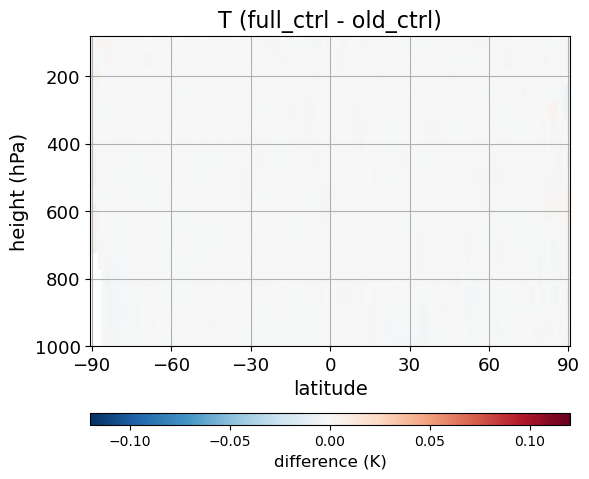

In [4]:
# zonal mean temperature difference (exp[n] - expref):
lats, levs = np.meshgrid(lat, lev)

for exptest in exps[1:]:

    # temperature
    vmin_abs = -0.12
    vmax_abs =  0.12

    
    # figure size:
    fig, ax = plt.subplots(figsize=(6,5))

    # ax1: temperature
    contour1=ax.pcolormesh(lats, levs, t_mean[exptest]-t_mean[expref], cmap='RdBu_r', vmin=vmin_abs, vmax=vmax_abs)
    ax.invert_yaxis()
    ax.set_xlabel('latitude', fontsize=14)
    ax.set_xticks([-90,-60,-30,0,30,60,90])
    ax.set_ylabel('height (hPa)', fontsize=14)
    ax.set_title(f'T ({exptest} - {expref})', fontsize=16)
    ax.set_ylim(1000,80)
    
    ax.tick_params(axis='both', labelsize=13)
    
    ax.grid(True)
    # set colorbar
    cbar = fig.colorbar(contour1,location='bottom',aspect=40)
    cbar.set_label('difference (K)', fontsize=12)
    
    plt.tight_layout()
    plt.savefig(f"mean_T_{exptest.replace('.', '')}_minus_{expref}")
    plt.show()
    

    #plt.savefig(f"IFS_drmse_T_{exptest}.png")


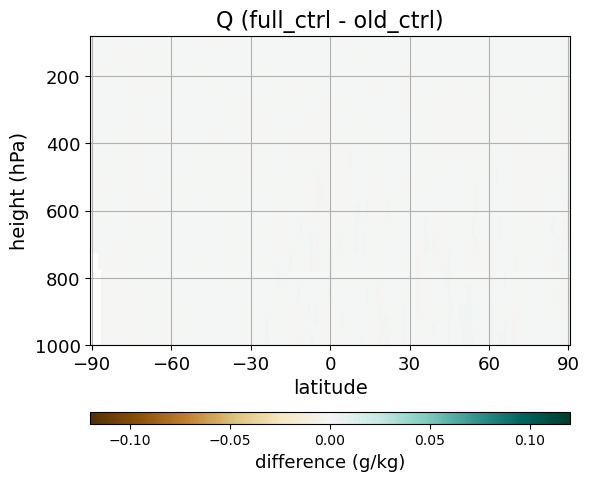

In [5]:
# zonal mean humidity difference (exp[n] - expref):
lats, levs = np.meshgrid(lat, lev)

for exptest in exps[1:]:

    # temperature
    vmin_abs = -0.12
    vmax_abs =  0.12

    # figure size:
    fig, ax = plt.subplots(figsize=(6,5))

    contour = ax.pcolormesh(lats, levs, (q_mean[exptest] - q_mean[expref])*1e3, cmap='BrBG', vmin=vmin_abs, vmax=vmax_abs)
    ax.invert_yaxis()
    ax.set_xlabel('latitude', fontsize=14)
    ax.set_xticks([-90,-60,-30,0,30,60,90])
    ax.set_ylabel('height (hPa)', fontsize=14)
    ax.set_title(f'Q ({exptest} - {expref})', fontsize=16)
    ax.set_ylim(1000,80)
    
    ax.tick_params(axis='both', labelsize=13)

    ax.grid(True)
    # set colorbar
    cbar = fig.colorbar(contour,location='bottom',aspect=40)
    cbar.set_label('difference (g/kg)', fontsize=13)
    
    plt.tight_layout()
    plt.savefig(f"mean_Q_{exptest.replace('.', '')}_minus_{expref}")
    plt.show()

In [ ]:
# below uses the ERA5 comparison output::

In [ ]:
# ERA5 - 2DMAPS-temperature-rmse

dt = bias_t_era_test - bias_t_era_ctrl

plt_height = [100., 200., 500., 700., 850., 1000.]

zz_era = np.where(np.isin(lev_era, plt_height))
lats, lons = np.meshgrid(lat_era, lon_era)


# contour levels for bias
val_max_b = [1.5, 1.5, 1.5, 2.0, 3.0, 4.0]
val_min_b = -np.array(val_max_b)


# contour levels for difference
val_max_d = [0.4, 0.2, 0.2, 0.4, 0.4, 0.4]
val_min_d = -np.array(val_max_d)

# Main Plot section:
for i in range(6):
    
    plt_levs_b = np.linspace(val_min_b[i], val_max_b[i], 21)
    plt_levs_d = np.linspace(val_min_d[i], val_max_d[i], 21)

    # figure size:
    fig = plt.figure(figsize=(14,5))
        
    # define the subplots
    ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())  # Add subplot at position 1
    ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())  # Add subplot at position 1

    # ax1: CTRL bias
    ax1.coastlines()
    plt_vars = bias_t_era_ctrl[zz_era[0][i],:,:].transpose()
    contour1 = ax1.contourf(lons, lats, plt_vars, cmap=tmap, levels=plt_levs_b, vmin=val_min_b[i], vmax=val_max_b[i])
    ax1.set_xlabel('longitude')
    ax1.set_ylabel('latitude') 
    ax1.set_title(f'Temperature bias ({expref}) at {plt_height[i]} (hPa), Ref=ERA5')
    gl = ax1.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Hide labels on the top side
    gl.right_labels = False  # Hide labels on the right side
    
    # set colorbar
    cbar = fig.colorbar(contour1,location='bottom',aspect=40)
    cbar.set_label('bias (K)')
    
    # ax2: differences
    ax2.coastlines()
    plt_vars = dt[zz_era[0][i],:,:].transpose()
    contour2 = ax2.contourf(lons, lats, plt_vars, cmap=tmap, levels=plt_levs_d, vmin=val_min_d[i], vmax=val_max_d[i])
    ax2.set_xlabel('longitude')
    ax2.set_ylabel('latitude') 
    ax2.set_title(f'Temperature difference ({exptest}-{expref}) at {plt_height[i]} (hPa)')
    gl = ax2.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Hide labels on the top side
    gl.right_labels = False  # Hide labels on the right side
    
    # set colorbar
    cbar = fig.colorbar(contour2,location='bottom',aspect=40)
    cbar.set_label('difference (K)')
    
    plt.savefig(f"Temperature-2DMAP-{plt_height[i]}hPa-{exptest}-minus-{expref}.png")

In [ ]:
# ERA5 - 2DMAPS-humidity-rmse

dq = bias_q_era_test - bias_q_era_ctrl

plt_height = [100., 200., 500., 700., 850., 1000.]

zz_era = np.where(np.isin(lev_era, plt_height))
lats, lons = np.meshgrid(lat_era, lon_era)


# contour levels for bias
val_max_b = [0.003, 0.03, 0.7, 1.2, 1.8, 2.5]
val_min_b = -np.array(val_max_b)


# contour levels for difference
val_max_d = [0.0005, 0.007, 0.15, 0.3, 0.3, 0.3]
val_min_d = -np.array(val_max_d)

# Main Plot section:
for i in range(6):
    
    plt_levs_b = np.linspace(val_min_b[i], val_max_b[i], 21)
    plt_levs_d = np.linspace(val_min_d[i], val_max_d[i], 21)

    # figure size:
    fig = plt.figure(figsize=(14,5))
        
    # define the subplots
    ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())  # Add subplot at position 1
    ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())  # Add subplot at position 1

    # ax1: CTRL bias
    ax1.coastlines()
    plt_vars = bias_q_era_ctrl[zz_era[0][i],:,:].transpose()*1e3
    contour1 = ax1.contourf(lons, lats, plt_vars, cmap=tmap, levels=plt_levs_b, vmin=val_min_b[i], vmax=val_max_b[i])
    ax1.set_xlabel('longitude')
    ax1.set_ylabel('latitude') 
    ax1.set_title(f'Humidity bias ({expref}) at {plt_height[i]} (hPa), Ref=ERA5')
    gl = ax1.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Hide labels on the top side
    gl.right_labels = False  # Hide labels on the right side
    
    # set colorbar
    cbar = fig.colorbar(contour1,location='bottom',aspect=40)
    cbar.set_label('bias (g/kg)')
    
    # ax2: differences
    ax2.coastlines()
    plt_vars = dq[zz_era[0][i],:,:].transpose()*1e3
    contour2 = ax2.contourf(lons, lats, plt_vars, cmap=tmap, levels=plt_levs_d, vmin=val_min_d[i], vmax=val_max_d[i])
    ax2.set_xlabel('longitude')
    ax2.set_ylabel('latitude') 
    ax2.set_title(f'Humidity difference ({exptest}-{expref}) at {plt_height[i]} (hPa)')
    gl = ax2.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Hide labels on the top side
    gl.right_labels = False  # Hide labels on the right side
    
    # set colorbar
    cbar = fig.colorbar(contour2,location='bottom',aspect=40)
    cbar.set_label('difference (g/kg)')
    
    plt.savefig(f"Humidity-2DMAP-{plt_height[i]}hPa-{exptest}-minus-{expref}.png")

In [ ]:
# ERA5 - 2DMAPS-clwmr

dclw = bias_clw_era_test - bias_clw_era_ctrl

plt_height = [200., 500., 700., 850., 925.]

zz_era = np.where(np.isin(lev_era, plt_height))
lats, lons = np.meshgrid(lat_era, lon_era)


# contour levels for bias
val_max_b = [0.3, 3.5, 3.5, 10.0, 10.0]
val_min_b = -np.array(val_max_b)


# contour levels for difference
val_max_d = [0.1, 1.2, 1.2, 1.5, 1.8]
val_min_d = -np.array(val_max_d)

# Main Plot section:
for i in range(5):
    
    plt_levs_b = np.linspace(val_min_b[i], val_max_b[i], 21)
    plt_levs_d = np.linspace(val_min_d[i], val_max_d[i], 21)

    # figure size:
    fig = plt.figure(figsize=(14,5))
        
    # define the subplots
    ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())  # Add subplot at position 1
    ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())  # Add subplot at position 1

    # ax1: CTRL bias
    ax1.coastlines()
    plt_vars = bias_clw_era_ctrl[zz_era[0][i],:,:].transpose()*1e5
    contour1 = ax1.contourf(lons, lats, plt_vars, cmap=tmap, levels=plt_levs_b, vmin=val_min_b[i], vmax=val_max_b[i])
    ax1.set_xlabel('longitude')
    ax1.set_ylabel('latitude') 
    ax1.set_title(f'CLW bias ({expref}) at {plt_height[i]} (hPa), Ref=ERA5')
    gl = ax1.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Hide labels on the top side
    gl.right_labels = False  # Hide labels on the right side
    
    # set colorbar
    cbar = fig.colorbar(contour1,location='bottom',aspect=40)
    cbar.set_label('bias (0.01 g/kg)')
    
    # ax2: differences
    ax2.coastlines()
    plt_vars = dclw[zz_era[0][i],:,:].transpose()*1e5
    contour2 = ax2.contourf(lons, lats, plt_vars, cmap=tmap, levels=plt_levs_d, vmin=val_min_d[i], vmax=val_max_d[i])
    ax2.set_xlabel('longitude')
    ax2.set_ylabel('latitude') 
    ax2.set_title(f'CLW difference ({exptest}-{expref}) at {plt_height[i]} (hPa)')
    gl = ax2.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Hide labels on the top side
    gl.right_labels = False  # Hide labels on the right side
    
    # set colorbar
    cbar = fig.colorbar(contour2,location='bottom',aspect=40)
    cbar.set_label('difference (0.01 g/kg)')    
    plt.savefig(f"CLW-2DMAP-{plt_height[i]}hPa-{exptest}-minus-{expref}.png")

In [ ]:
# ERA5 - lat-height-plot-temperature

lats, levs = np.meshgrid(lat_era, lev_era)

zbias_t_era_test = np.mean(bias_t_era_test, axis=2)
zbias_t_era_ctrl = np.mean(bias_t_era_ctrl, axis=2)
dt = zbias_t_era_test - zbias_t_era_ctrl

# plot contour levels
dlevs      = 0.3
dmax       = 3.3
plt_levs_tb = np.arange(-dmax,dmax+dlevs,dlevs)

dlevs      = 0.005
dmax       = 0.08
#dlevs      = 0.01
#dmax       = 0.15
plt_levs_td = np.arange(-dmax,dmax+dlevs,dlevs)


# figure size:
fig = plt.figure(figsize=(14,5))

# define the subplots
ax1 = fig.add_subplot(1, 2, 1)  # Add subplot at position 1
ax2 = fig.add_subplot(1, 2, 2)  # Add subplot at position 2

# ax1: 
contour1=ax1.contourf(lats, levs, zbias_t_era_ctrl, cmap=tmap, levels=plt_levs_tb, vmin=np.min(plt_levs_tb), vmax=np.max(plt_levs_tb))
ax1.invert_yaxis()
ax1.set_xlabel('latitude')
ax1.set_ylabel('height (hPa)')
ax1.set_title(f'Temperature bias ({expref}), Ref=ERA5')
ax1.grid(True)
# set colorbar
cbar = fig.colorbar(contour1,location='bottom',aspect=40)
cbar.set_label('bias (K)')

# ax2: 
contour2 = ax2.contourf(lats, levs, dt, cmap=tmap, levels=plt_levs_td, vmin=np.min(plt_levs_td), vmax=np.max(plt_levs_td))
ax2.invert_yaxis()
ax2.set_xlabel('latitude')
ax2.set_ylabel('height (hPa)')
ax2.set_title(f'Temperature difference ({exptest}-{expref})')
ax2.set_ylim(1000,100)
ax2.grid(True)
# set colorbar
cbar = fig.colorbar(contour2,location='bottom',aspect=40)
cbar.set_label('difference (K)')

plt.savefig(f"Temperature-{exptest}-minus-{expref}.png")

In [ ]:
# ERA5 - lat-height-plot-humidity

lats, levs = np.meshgrid(lat_era, lev_era)

zbias_q_era_test = np.mean(bias_q_era_test, axis=2)
zbias_q_era_ctrl = np.mean(bias_q_era_ctrl, axis=2)
dq = zbias_q_era_test - zbias_q_era_ctrl

# plot contour levels
dlevs      = 0.1
dmax       = 0.8
plt_levs_tb = np.arange(-dmax,dmax+dlevs,dlevs)

dlevs      = 0.005
dmax       = 0.06
#dlevs      = 0.01
#dmax       = 0.15
plt_levs_td = np.arange(-dmax,dmax+dlevs,dlevs)


# figure size:
fig = plt.figure(figsize=(14,5))

# define the subplots
ax1 = fig.add_subplot(1, 2, 1)  # Add subplot at position 1
ax2 = fig.add_subplot(1, 2, 2)  # Add subplot at position 2

# ax1: 
contour1=ax1.contourf(lats, levs, zbias_q_era_ctrl*1e3, cmap=tmap, levels=plt_levs_tb, vmin=np.min(plt_levs_tb), vmax=np.max(plt_levs_tb))
ax1.invert_yaxis()
ax1.set_xlabel('latitude')
ax1.set_ylabel('height (hPa)')
ax1.set_title(f'Humidity bias ({expref}), Ref=ERA5')
ax1.grid(True)
# set colorbar
cbar = fig.colorbar(contour1,location='bottom',aspect=40)
cbar.set_label('bias (g/kg)')

# ax2: 
contour2 = ax2.contourf(lats, levs, dq*1e3, cmap=tmap, levels=plt_levs_td, vmin=np.min(plt_levs_td), vmax=np.max(plt_levs_td))
ax2.invert_yaxis()
ax2.set_xlabel('latitude')
ax2.set_ylabel('height (hPa)')
ax2.set_title(f'Humidity difference ({exptest}-{expref})')
ax2.set_ylim(1000,100)
ax2.grid(True)
# set colorbar
cbar = fig.colorbar(contour2,location='bottom',aspect=40)
cbar.set_label('difference (g/kg)')

plt.savefig(f"Humidity-{exptest}-minus-{expref}.png")

In [ ]:
# ERA5 - lat-height-plot-cloud liquid water mixing ratio

lats, levs = np.meshgrid(lat_era, lev_era)

zbias_clw_era_test = np.mean(bias_clw_era_test, axis=2)
zbias_clw_era_ctrl = np.mean(bias_clw_era_ctrl, axis=2)
dclw = zbias_clw_era_test - zbias_clw_era_ctrl

# plot contour levels
#dlevs      = 0.005
#dmax       = 0.055
dlevs      = 0.005
dmax       = 0.055
plt_levs_tb = np.linspace(-dmax, dmax, 21)


#dlevs      = 0.0002
#dmax       = 0.0015
dlevs      = 0.0001
dmax       = 0.001
plt_levs_td = np.linspace(-dmax, dmax, 21)


# figure size:
fig = plt.figure(figsize=(14,5))

# define the subplots
ax1 = fig.add_subplot(1, 2, 1)  # Add subplot at position 1
ax2 = fig.add_subplot(1, 2, 2)  # Add subplot at position 2

# ax1: 
contour1=ax1.contourf(lats, levs, zbias_clw_era_ctrl*1e3, cmap=tmap, levels=plt_levs_tb, vmin=np.min(plt_levs_tb), vmax=np.max(plt_levs_tb))
ax1.invert_yaxis()
ax1.set_xlabel('latitude')
ax1.set_ylabel('height (hPa)')
ax1.set_title(f'CLW bias ({expref}), Ref=ERA5')
ax1.grid(True)
# set colorbar
cbar = fig.colorbar(contour1,location='bottom',aspect=40)
cbar.set_label('bias (g/kg)')

# ax2: 
contour2 = ax2.contourf(lats, levs, dclw*1e3, cmap=tmap, levels=plt_levs_td, vmin=np.min(plt_levs_td), vmax=np.max(plt_levs_td))
ax2.invert_yaxis()
ax2.set_xlabel('latitude')
ax2.set_ylabel('height (hPa)')
ax2.set_title(f'CLW difference ({exptest}-{expref})')
ax2.set_ylim(1000,100)
ax2.grid(True)
# set colorbar
cbar = fig.colorbar(contour2,location='bottom',aspect=40)
cbar.set_label('difference (g/kg)')

plt.savefig(f"CLW-{exptest}-minus-{expref}.png")

In [ ]:
print(plt_levs_td)

In [ ]:
aa = np.insert(plt_levs_td, 0, -100)
aa = np.append(aa, 100)

In [ ]:
print(aa)